<a href="https://colab.research.google.com/github/gohzhihwee/stuffs/blob/main/stats_models_for_finance_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Python libraries
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import seaborn as sns
import scipy.stats as stats
import pylab
from scipy.stats import kurtosis
from scipy.stats import skewnorm

# **Concept 1: Skewness**

# **Definition**

Skewness is a measurement of the extent to which a distribution differs from the Standard Normal (or Gaussian) distribution. The mathematical definition shown here is of Pearson’s skewness, provided by Chen et al. for Investopedia:

\begin{align}
\text{Pearson's Skewness} = \frac{Sk_{1}=\frac{\bar{X}-Mo}{s}}{Sk_{2}=\frac{3(\bar{X}-Md)}{s}}
\end{align}

Where $Sk_{1}$ is known as Pearson’s first coefficient of skewness (mode skewness), $Sk_{2}$ as Pearson’s second coefficient of skewness (median skewness), $\bar{X}$ the mean value of the distribution, $Mo$ the mode, $Md$ the median value and $s$ the standard deviation. An alternative formula applicable to the case of univariate data is also shown below:

\begin{align}
\text{Skewness} = \frac{\sum_{i=1}^{N}{(Y_{i}-\bar{Y})}^{3}}{Ns^{3}}
\end{align}

Where $Y_i$ is a given point on the distribution, $\bar{Y}$ the mean, $N$ the number of data points and $s$ the standard deviation.

# **Description**

The mode of a distribution is the value that occurs the most frequently. In a Gaussian distribution, the mean value occurs the most frequently and is therefore equal to the mode. Hence, involving the mode in the calculation of the first coefficient of skewness is necessary as the distance between the mean and mode, as a ratio of the standard deviation, gives us quantitative insight into how much the given distribution deviates from a true Gaussian. Involving the median in the calculation of the second coefficient of skewness is similarly important (the multiple of 3 is derived from a proof in an article by Johnson and Rogers, which will not be covered in detail in this guidebook).

A given distribution is said to be skewed when the mean is not at the center of the data mass. Skewness can either be positive (right-skewed) or negative (left-skewed).

# **Demonstration**

In [ ]:
from scipy.stats import skew

# Set random seed for reproducibility
np.random.seed(0)

# Create data with positive skewness
positive_skew_data = np.random.exponential(scale=2, size=20)

# Create data with negative skewness by negating and shifting
negative_skew_data = -np.random.exponential(scale=2, size=20)

# Calculate skewness
positive_skewness = skew(positive_skew_data)
negative_skewness = skew(negative_skew_data)

# Print skewness values

print(positive_skew_data)
print("Mean:", positive_skew_data.mean())
print("Mode:", stats.mode(positive_skew_data))
print(f'Positive Skewness: {positive_skewness}')
print("\n")
print(negative_skew_data)
print("Mean:", negative_skew_data.mean())
print("Mode:", stats.mode(negative_skew_data))
print(f'Negative Skewness: {negative_skewness}')

[1.59174902 2.51186153 1.84644629 1.5744023  1.10209698 2.07631859
 1.1510384  4.44704883 6.62982436 0.9672042  3.13779228 1.50534822
 1.67886569 5.19650831 0.14737071 0.18232206 0.04085117 3.57497536
 3.01156846 4.08062856]
Mean: 2.322711066375851
Mode: ModeResult(mode=0.0408511733684499, count=1)
Positive Skewness: 0.8109932717270432


[-7.69044368 -3.21047912 -1.23785892 -3.03307195 -0.25174882 -2.04286377
 -0.30945937 -5.7888409  -1.47565456 -1.07113144 -0.61456071 -2.97650968
 -1.21816483 -1.68066941 -0.03793714 -1.92276186 -1.89399336 -1.91909595
 -5.75583016 -2.29027792]
Mean: -2.3210676763673264
Mode: ModeResult(mode=-7.6904436763336985, count=1)
Negative Skewness: -1.3291938057444275


In [ ]:
# Left-Skewed, Gaussian and Right-Skewed Distributions - Here we adapt the HistogPlot functions given in WQU's MScFE610 module notes
# (Module 3, Lesson 2) as they enable us to visualize mean, median and mode in the same plot as the histogram and traced p.d.fs

def HistogPlot(a, label):
  np.random.seed(123)
  r = skewnorm.rvs(a, size=500)
  x = np.linspace(skewnorm.ppf(0.0001, a), skewnorm.ppf(0.9999, a), 500)
  plt.plot(x, skewnorm.pdf(x, a), "r-", lw=2, alpha=0.7, label=label)

  # Adjust the n, bins and patches quantities to control the density (how many bars) the histogram has
  n, bins, patches = plt.hist(r, 20, density=True, histtype="stepfilled", alpha=0.5)

  # Add mean line (rotate it by 90 degrees so it displays vertically - this helps to avoid label overlapping)
  plt.axvline(r.mean(), color="k", linestyle="dashed", linewidth=1)
  plt.text(r.mean(), 0.1, "Mean", rotation=90)

  # Add median line
  plt.axvline(np.median(r), color="k", linestyle="dashed", linewidth=1)
  plt.text(np.median(r), 0.1, "Mean", rotation=90)

  # Add mode line (check for the most frequent value)
  plt.axvline(x=(bins[n.argmax()] + bins[n.argmax()+1] / 2))
  plt.text((bins[n.argmax()] + bins[n.argmax()+1] / 2), 0.1, "Mode", rotation=90)

  plt.legend()

# **Diagram**

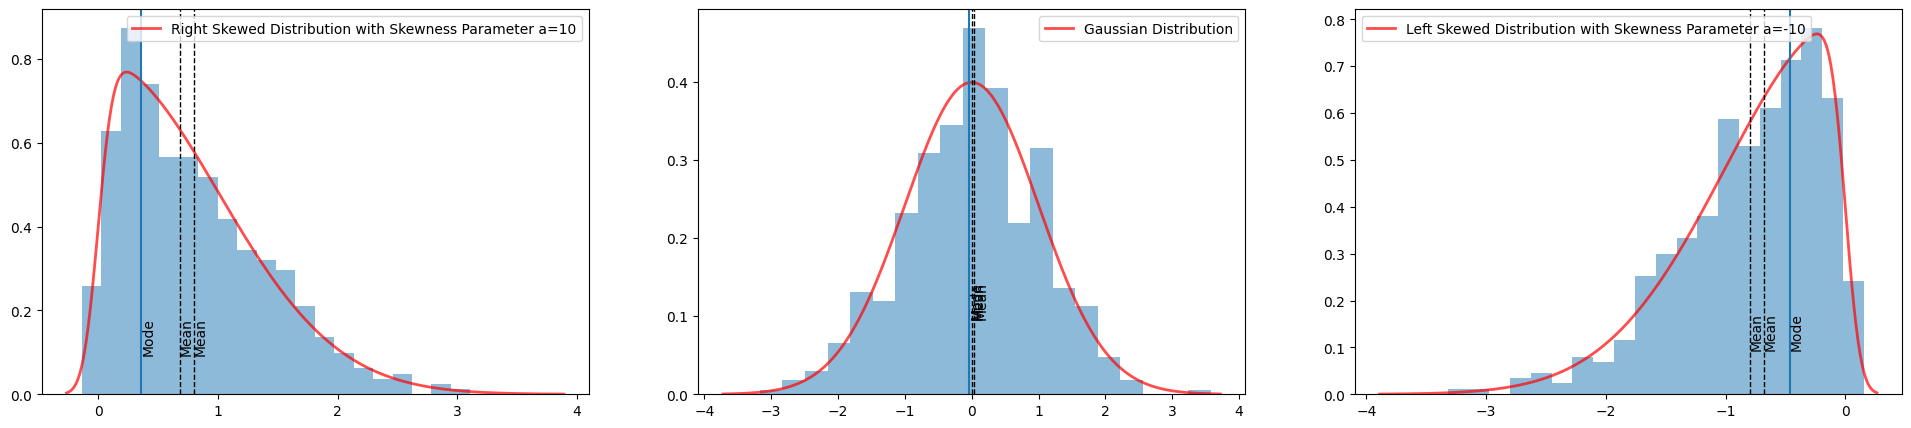

In [ ]:
# Display the Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 5))
ax1 = plt.subplot(131)
HistogPlot(10, "Right Skewed Distribution with Skewness Parameter a=10")
ax2 = plt.subplot(132)
HistogPlot(0, "Gaussian Distribution")
ax3 = plt.subplot(133)
HistogPlot(-10, "Left Skewed Distribution with Skewness Parameter a=-10")
plt.show()

# **Diagnosis**

Relatively straightforward; can be done both by visual inspection of the given distribution when plotted as well as verified via the given formulae e.g. Pearson’s coefficient– if $\bar{X}\neq{Mo}$, the distribution is skewed (note that a distribution can be non-Gaussian and not skewed).

# **Damage**

Skewness is disastrous for machine learning outcomes when not corrected in the preprocessing process; methods such as Ordinary Least Squares (OLS) and Weighted Least Squares (WLS) regression explicitly require that the data given be independent and identically distributed (i.i.d) on a Gaussian distribution. Without correcting for skewness, results from these methods will be invalid. Furthermore, even in methods which do not explicitly require for data to be in a Gaussian distribution (e.g. neural nets), to train on data that has not been corrected for skewness would be tantamount to training on biased data and would result in the method converging to weights that may not be reflective of the modeling scenario under most circumstances.

# **Directions**

Correction of skewness is done by using data transformations which convert data into a form close to a Gaussian distribution, if not a Gaussian distribution – using a method such as the Box-Cox transformation to preprocess the data will ensure that it is normally distributed (an alternative method such as log-transform is also useful). However, care should be taken when deciding on which transformation to use – some transformations, e.g. Principal Component Analysis (PCA) or embedding transformations such as t-SNE (t-distribution Stochastic Neighbor Embedding) are difficult to inverse/undo completely, resulting in a distortion of the original data which can make comparison with model predictions inaccurate and subsequent evaluation of model performance unreliable.

If one wishes to continue training on the uncorrected data, their best bet for reliable results would be to use non-parameteric regression methods which do not presume prior relationships in the data. Non-parametric regression methods may not necessarily require data to follow a singular (stationary) distribution or function; however, additional steps may need to be taken to further transform the data, e.g. detrending, cointegration to form stationary time series data, or seasonal decomposition. Stationarity is covered in the last section. The techniques of detrending and cointegration will be covered in a later edition of this guidebook.


# **Concept 2: Kurtosis and Heteroscedasticity**

# **Definition**

Two separate concepts are described in this section. Kurtosis is a statistical measure that is strongly positively correlated to the likelihood of outlier values occurring in a given distribution. For univariate data, kurtosis is given by

\begin{align}
\text{Kurtosis} = \frac{\sum_{i=1}^{N}{(Y_{i}-\bar{Y})}^{4}}{Ns^{4}}
\end{align}

Where $Y_i$ is a given point on the distribution, $\bar{Y}$ the mean, $N$ the number of data points and $s$ the standard deviation.

Heteroscedasticity is a phenomenon that occurs when the covariances of the random variables occurring in said distribution are different/unique (as opposed to being identical, which is known as homoscedasticity).


# **Description**

Notice the resemblance of the formula for kurtosis in the case of univariate data to that of skewness (definition above) – it is known as the fourth derivative (or moment) of a given distribution about its mean, where kurtosis is the third. In other words, kurtosis can be derived from skewness.

No formula is associated with heteroscedasticity as it is a property of data rather than a quantity to be calculated.


# **Demonstration**

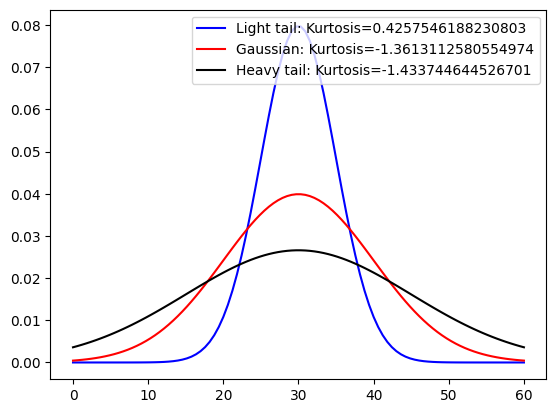

In [ ]:
# Generating distributions with different kurtosis values
x = np.linspace(0, 60, 100) # For generating an array of 100 values in the range [0, 60] inclusive
y1 = stats.norm.pdf(x, loc=30, scale=5)
y2 = stats.norm.pdf(x, loc=30, scale=10)
y3 = stats.norm.pdf(x, loc=30, scale=15)

# Plot the 3 distributions y1, y2 and y3 on the same plot
plt.plot(x, y1, c="b", label=f"Light tail: Kurtosis={kurtosis(y1)}")
plt.plot(x, y2, c="r", label=f"Gaussian: Kurtosis={kurtosis(y2)}")
plt.plot(x, y3, c="k", label=f"Heavy tail: Kurtosis={kurtosis(y3)}")
plt.legend()

In [ ]:
# Checking for heteroscedasticity in data using the Breusch-Pagan Test
# Import lzip (this package gives you the Lagrangian, the f-value, p-value and f-p values)
from statsmodels.compat import lzip
# Formulate a dataset - here we use the simple example of a sample of basketball player statistics
df = pd.DataFrame({'rating': [9, 2, 54, 88, 100, 89, 81, 72, 87, 86],
                   'points': [142, 200, 59, 16, 9, 20, 63, 65, 60, 61],
                   'assists': [50, 49, 20, 10, 5, 3, 5, 10, 12, 20],
                   'rebounds': [19, 15, 10, 1, 1, 2, 2, 5, 5, 9]})

# **Diagram**

In [ ]:
# Display the plot
plt.show()

In [ ]:
# Fitting and displaying the results of the Breusch-Pagan Test on our basketball player statistics
#fit regression model
fit = smf.ols('rating ~ points+assists+rebounds', data=df).fit()

#view model summary
print(fit.summary())

names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fit.resid, fit.model.exog)

lzip(names, test)


                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     26.08
Date:                Tue, 04 Jun 2024   Prob (F-statistic):           0.000769
Time:                        14:33:37   Log-Likelihood:                -35.881
No. Observations:                  10   AIC:                             79.76
Df Residuals:                       6   BIC:                             80.97
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    104.9203      5.875     17.858      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


[('Lagrange multiplier statistic', 3.003068107811316),
 ('p-value', 0.39115237624618104),
 ('f-value', 0.8583956951657388),
 ('f p-value', 0.5116443192466094)]

In this case, our p-value is 0.39, which is greater than 0.05. Hence, it falls within the boundary condition of H_0 and hence we do not reject the null hypothesis. There is thus insufficient evidence at the 5% significance level to conclude that heteroscedasticity exists in this dataset. However, in the event that the p-value is lower than 0.05, we would be dealing with heteroscedastic data and would need to analyze our data with this consideration in mind; certain techniques which assume homoscedasticity, such as linear regression, cannot be deployed directly on this data as it would produce unreliable results.

# **Diagnosis**

Kurtosis is visually identified on a given distribution by a high base or ‘tail’ that makes the distribution appear ‘tall’. As suggested by its definition, the higher the kurtosis value, the greater the likelihood and frequency of extreme or outlier events occurring in the distribution. Alternatively, kurtosis can be calculated using the formulae provided. Heteroscedasticity is verified either via inspection of the covariance matrix representing the variables, or via conducting a specific test to check for heteroscedasticity such as the Breusch-Pagan Test (as shown above).

# **Damage**

As with that of uncorrected skewness, uncorrected kurtosis makes the distribution non-Gaussian in nature (a Gaussian distribution has zero kurtosis and skewness) and would hence render the results of techniques that require a Gaussian distribution, e.g. OLS and WLS regression, invalid. The broader implication of the prevalence of outlier points as indicated by a high kurtosis value is that weights obtained from training on the modelling scenario represented by this uncorrected data would not be reflective of data describing this same scenario at a different time. This means that any predictions made on the uncorrected data are unreliable. Data that is heteroscedastic is still trainable, but the number of methods that can be deployed on it to produce reliable results is more limited (OLS cannot be used).

# **Directions**

The best method to use if one wishes to continue training on uncorrected data with high kurtosis is perhaps Ridge regression, which is ideal for data where many variable coefficients are large and significantly influential (provided that the presence of many latent variables explains the prevalence of outliers to a large extent).

Data that is heteroscedastic (and Gaussian) can be processed using techniques such as WLS regression. If heteroscedastic and non-Gaussian, non-parametric regression methods may be used.


# **Concept 3: Sensitivity to Outliers**

# **Definition**

This is a phenomenon that pertains not as much to data as it does to statistical/machine learning methods that process data, and is a property that describes the extent to which the results produced by said methods change when outliers are included in the input data.

# **Description**

Statistical models that estimate volatility are sensitive to outliers. When estimating volatility, presence of outliers can result in overestimated volatility estimates, whereas excluding them may underestimate volatility.

Outliers can disproportionately influence the parameter estimates in models such as linear regression. and distort key metrics used to evaluate model performance, such as the mean squared error (MSE) or R-squared value. This can give a misleading impression of the model's accuracy and predictive power. In predictive modeling, outliers can lead to poor generalization to new data. The model may overfit to the outliers, reducing its ability to make accurate predictions on unseen data.

Some machine learning models produce results that change more drastically than those of others in the presence of outliers; notable examples include the Bisquare method for generating M-estimates for robust regression as well as WLS regression, which assigns weights to latent fringe/tangential variables that potentially describe just outlier values.

# **Demonstration**

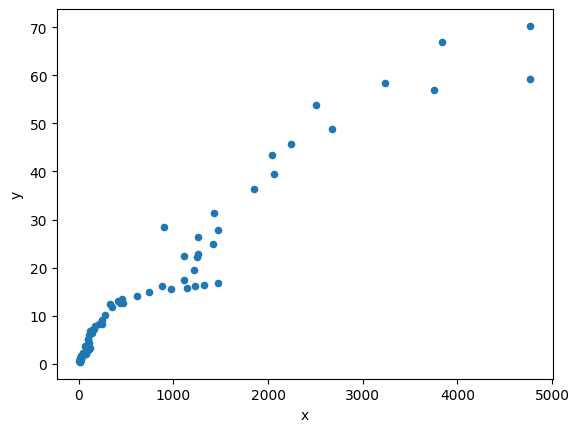

In [ ]:
# Calculating Correlation between two variables using Pearson, Spearman and Kendall-Tau Correlation Methods - in this case we compare the
# US 10-Year T-Bond Annual Returns and the S&P 500 Daily Returns from the years 1928-2023
# The following dataset was curated by NYU Stern School of Business
dataset  = pd.read_csv('histretSP_rawreturnsdata.csv', header=0, index_col=0)

# A scatter plot is used to visualize the data so as to make outliers clearly visible
scplot = dataset.plot.scatter(x=dataset.columns[0], y=dataset.columns[1])
scplot.set(xlabel='x', ylabel='y')
# plt.show()

# Calculating Pearson's Correlation Coefficient, Spearman's Rho and Kendall's Tau
pearson = stats.pearsonr(dataset[dataset.columns[0]], dataset[dataset.columns[1]])
spearman = stats.spearmanr(dataset[dataset.columns[0]], dataset[dataset.columns[1]])
kendall = stats.kendalltau(dataset[dataset.columns[0]], dataset[dataset.columns[1]])

# print(f"Pearson's Correlation Coefficient: {pearson[0]}")
# print(f"Spearman's Rho: {spearman[0]}")
# print(f"Kendall's Tau: {kendall[0]}")

# **Diagram**

In [ ]:
plt.show()
print(f"Pearson's Correlation Coefficient: {pearson[0]}")
print(f"Spearman's Rho: {spearman[0]}")
print(f"Kendall's Tau: {kendall[0]}")

Pearson's Correlation Coefficient: 0.9721939495306631
Spearman's Rho: 0.9892366367368242
Kendall's Tau: 0.922382624500954


Based on the closeness of the values of Spearman’s rho and Kendall’s tau to 1, we can deduce that the two variables are strongly monotonically related and concordant. In this case, the removal of a variable is unlikely to drastically affect the ranking order of the distribution and hence, our data is unlikely to be extremely sensitive to outliers.

# **Diagnosis**

This phenomenon can be diagnosed by comparing the results of a given model trained on a dataset excluding a given outlier and those of the same model architecture when trained on the same dataset including the outlier. Alternatively, it is diagnosed by calculating and analyzing the correlation coefficients produced by different methods (Spearman’s rho, Kendall’s Tau and Pearson’s correlation coefficient); a drastic difference between the Pearson’s correlation coefficient and the former two coefficients (especially Spearman’s rho) indicates that the outliers produce significant effect on the correlation coefficients and would hence significantly affect the variable coefficients (weights) in the resulting learned function. In the above demonstration, Pearson's correlation coefficient differs from Spearman's Rho and Kendall's Tau, indicating that the data has outliers that would drastically affect the prediction results had a simple linear-based regression/correlation approach been used.

Aside from the solution outlined in our demonstration, other ways to measure the sensitivity of outliers in a model include the following:

*Cook's Distance*: Cook's Distance measures the influence of each data point on the fitted regression coefficients. A large Cook's Distance indicates a significant influence of the data point.

*Leverage Values*: Leverage values measure the influence of each data point on the fitted values. High leverage points can significantly affect the regression line.

*DFFITS*: DFFITS measures the influence of a data point on the fitted value. Values larger than 2/sqrt(n) indicate influential points.

*DFBETAS*: DFBETAS measures the influence of a data point on each regression coefficient. Large values indicate influential points.


# **Damage**

Outliers may indicate the presence of latent variables that predominantly describe the outlier data and not the main body of data; including these variables and attaching to them coefficients that are in the same order of magnitude as the principal latent variables describing the data would not be correct as this would result in the model overfitting to include the outlier points. The outcome would be a trained model that achieves a disproportionately large error on the testing data relative to training data.

# **Directions**

It is good practice to incorporate into the model a way to reduce the degree of influence of weights that do not have a big influence on most of the data points, such as a penalty function which exists in methods such as Ridge and LASSO regression. Alternatively, the influence of outlier points on the result can also be reduced by collecting more valid data.

For calculating the extent to which two variables are correlated, Spearman correlation is robust to outliers and is a good method to use.

# **Concept 4: Overreliance on the Gaussian Distribution**

# **Definition**

According to Chen et al. from Investopedia, the Gaussian distribution is a probability distribution that is symmetric about the mean and appears as a "bell curve" when graphed. It is calculated using the formula below:

\begin{align*}
f(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{align*}

where $\mu$ is the mean and $\sigma$ is the standard deviation of the distribution.


A lot of real world phenomena does not follow the normal distribution. Assuming normality may oversimplify the underlying complexity of the data, leading to a loss of important information and pattern. This is a problem that arises when a modelling solution to a scenario predominantly requires that data describing said scenario be i.i.d on a Gaussian distribution.

# **Description**

A modelling solution, which refers to a combination of statistical and machine learning techniques, that assumes a Gaussian distribution for a majority of its processes will produce correct data only when the data is Gaussian. It will otherwise return unreliable and/or inaccurate results.

# **Demonstration**

In [ ]:
# Shapiro-Wilk Test for assessing whether a random variable is on a Standard Normal Distribution
# Generate two arrays of data; one that is normally distributed and another that is to be tested for Gaussianity (y)
np.random.seed(100)
x = np.random.normal(loc=50, scale=15, size=100)
y = np.random.randint(0, 100, size=100)

# Conduct the Shapiro-Wilk Test on the normally distributed data to assess if it is normally distributed
shapiro_test = stats.shapiro(x)

# Conduct the Shapiro-Wilk Test on the generated y-data to assess if it is normally distributed
shapiro_test_y = stats.shapiro(y)

# **Diagram**

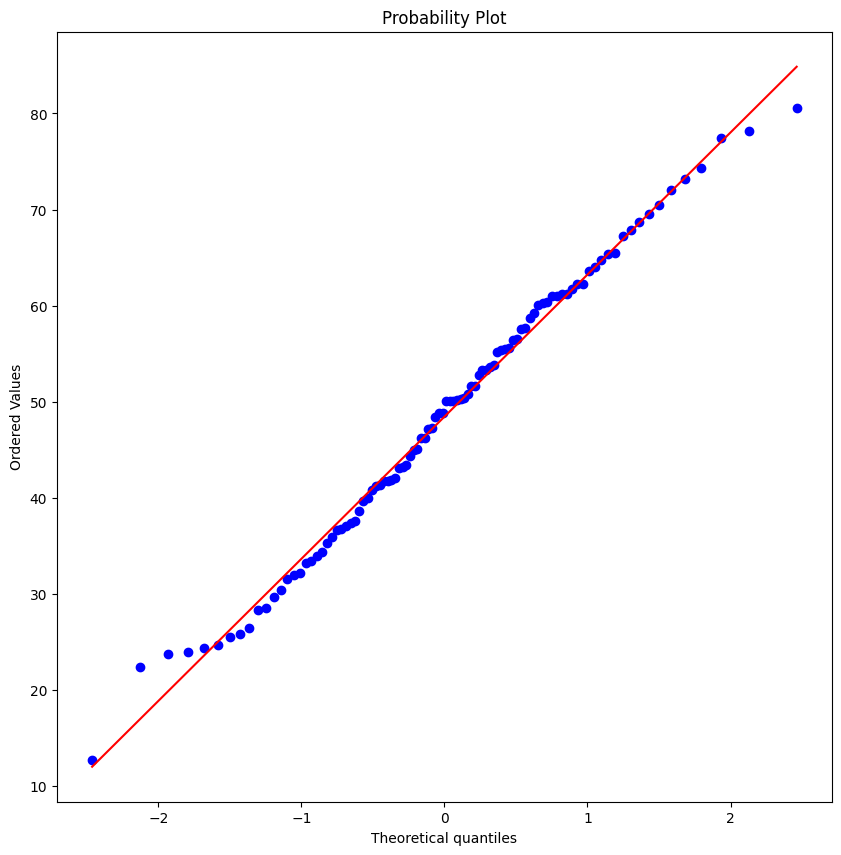

In [ ]:
# Generate a QQ-plot of normally distributed data
plt.figure(figsize=(10,10))
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

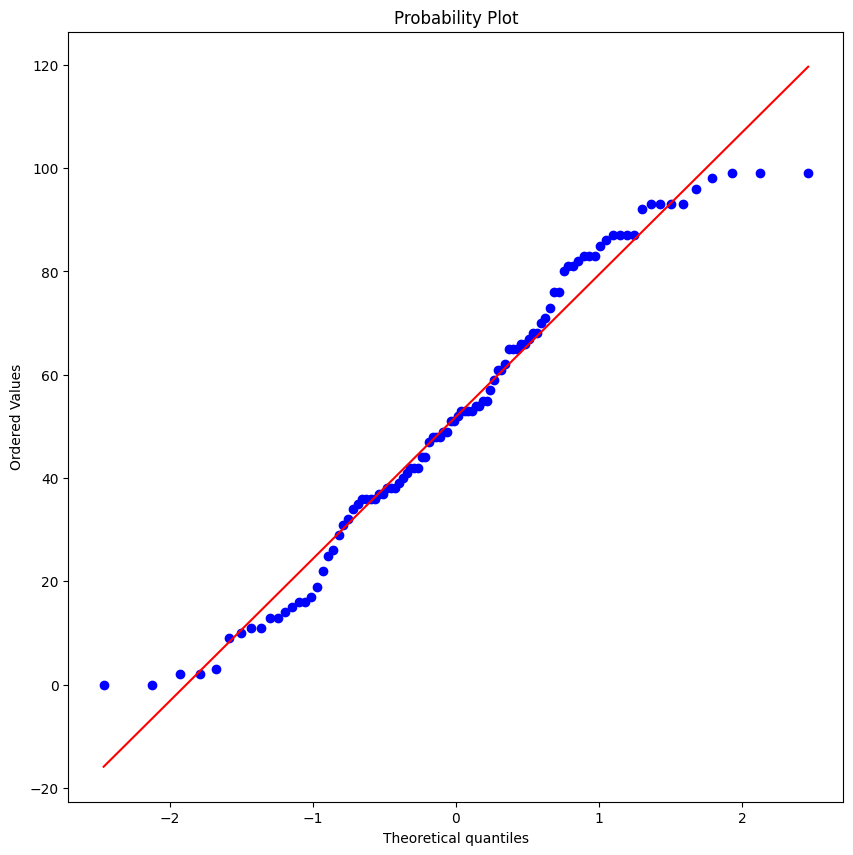

In [ ]:
# Generate a QQ-plot of the random y data
plt.figure(figsize=(10,10))
stats.probplot(y, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Print the Shapiro W and p-value for the normally distributed data
print(f"Shapiro-Wilk Test: {shapiro_test[0]}")
print(f"p-value: {shapiro_test[1]}")

Shapiro-Wilk Test: 0.9899469614028931
p-value: 0.660305917263031


In [ ]:
# Repeat for the random y data
print(f"Shapiro-Wilk Test: {shapiro_test_y[0]}")
print(f"p-value: {shapiro_test_y[1]}")

Shapiro-Wilk Test: 0.967266321182251
p-value: 0.013707454316318035


# **Diagnosis**

Done via comparison of the results of this approach with the results of a more robust modelling approach that does not presume Gaussianity, e.g. non-parametric regression methods. A copula method e.g. Gaussian’s copula or alternatively a goodness-of-fit test, e.g. Kolmogorov-Smirnov test, can be performed on the given distribution to assess the degree of similarity between the data and a Gaussian distribution. In the above demonstration, we used the Shapiro-Wilk test, a goodness-of-fit test explicitly designed to assess if a random variable falls on a Gaussian distribution.

# **Damage**

A modelling solution that can only produce reliable results when data is distributed in the form of an ideal Gaussian distribution is not robust and will be unfit for use in most real-world situations as data in most such situations is not perfectly normally distributed, and will not become so even after transformation has been applied. It will be particularly damaging in cases where there is non-stationarity in the dataset (described below).

# **Directions**

Less reliance on the Gaussian distribution is achieved through the incorporation of robust regression methods such as the generation of M-estimates prior to regression or non-parametric regression methods.

# **Concept 5: Non-stationarity**

# **Definition**

When the statistical properties of a given ensemble of data such as its mean, variance, skewness and kurtosis, vary in time instead of remaining constant.

# **Description**

Non-stationarity is a reflective example of a volatility problem in data – properties such as the mean and variance fluctuate with time and population size, which means that the distribution changes with time and population size as well.

# **Demonstration**

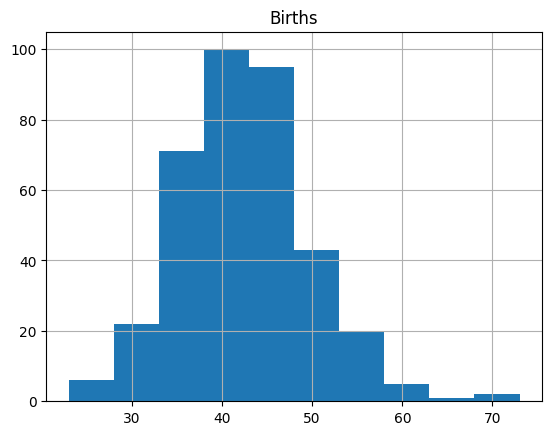

In [ ]:
# Test for nonstationarity in time series data - here we use the example provided by Jason Brownlee for MachineLearningMastery;
# specifically the dataset charting total number of female births per day for the year 1959
# Read the dataset and plot the data
fbdata = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
fbdata.hist()


# Split the dataset into two subsets - we will check if the mean and variance of the two subsets are equal
X = fbdata.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

# **Diagram**

In [ ]:
# Show the plotted data
plt.show()

# Print the mean and variances of the 2 subsets of data
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


# **Diagnosis**

Can be diagnosed by plotting distributions that cover different segments of a given dataset and comparing their means, variances, skewness and kurtosis values (as shown in the demonstration above). If the distributions look visibly different, the non-stationary nature of the data can be identified by visual inspection of the distributions.

# **Damage**

Non-stationarity poses a grave problem to methods that require data to be distributed in a specific order. Generally, regression methods that assume prior relationships between variables cannot be deployed usefully on data of this nature as the constantly changing relationships will make the results of such methods invalid.

# **Directions**

Non-parametric regression methods are the best way to handle non-stationary data as they do not assume general prior relationships of variables and operate on localized segments of data, as opposed to the entire population whose volatility will invalidate the results of parametric regression methods. If individual extents of non-stationarity are small (e.g. a fluctuation of ~0.01 in the variance or mean), smoothing transformations may suffice to make the data trainable using parametric methods.

# **References**

Bobbitt, Z. (2020, December 31). The Breusch-Pagan Test: Definition & Example. Retrieved from Statology: https://www.statology.org/breusch-pagan-test/

Brownlee, J. (2024, May 27). Datasets/daily-total-female-births. Retrieved from Github: https://github.com/jbrownlee/Datasets/blob/master/daily-total-female-births.csv

Chen, J. (2024, March 6). Right Skewed vs. Left Skewed Distribution. Retrieved from Investopedia: https://www.investopedia.com/terms/s/skewness.asp#:~:text=Skewness%20is%20the%20degree%20of,or%20negative%20and%20left-skewed.

Johnson, N., & Rogers, C. (1951, September). The Moment Problem for Unimodal Distributions. Retrieved from JSTOR: https://www.jstor.org/stable/2236630
NIST. (2024, May 27). 1.3.5.11. Measures of Skewness and Kurtosis. Retrieved from Engineering Statistics Handbook: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

NYU Stern School of Business. (2024, May 27). Annual Returns on Stock, T.Bonds and T.Bills: 1928 - Current. Retrieved from NYU Stern School of Business: https://pages.stern.nyu.edu/~adamodar/New_Home_Page/datafile/histretSPX.html

